# James' Salty Tests

Using the Salty package and Keras to model molecular properties.

## 1. Setting up

###  1.1 Import necessary packages

In [1]:
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
from keras.optimizers import Adam
import salty
from sklearn import preprocessing
from keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import time
import math
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Dropout, SpatialDropout2D, Flatten, Activation, merge, Input, Masking, BatchNormalization
from keras.layers.core import Lambda
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.layers.pooling import GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU, ELU
from keras.optimizers import Adam, Nadam, RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, Callback, LearningRateScheduler
from keras.regularizers import l2, l1
from keras.utils import np_utils
from keras import backend as K
import tensorflow as tf
from math import sqrt
import scipy
from sklearn.model_selection import StratifiedKFold, KFold, StratifiedShuffleSplit, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix,mean_squared_error,r2_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

c:\users\james\miniconda3\envs\research\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 1.2 Data Pre-processing
This step is performed using the salty package to aggregate property data and organize them into training and testing sets. Salty takes care of all pre-processing.

In [2]:
devmodel = salty.aggregate_data(['viscosity','thermal_conductivity','cpt']) # other option is viscosity
X_train, Y_train, X_test, Y_test = salty.devmodel_to_array\
    (devmodel, train_fraction=0.8)


In [3]:
import pandas as pd
data = pd.read_csv("C://users/james/miniconda3/envs/research/lib/site-packages/salty/data/thermal_conductivity_premodel.csv")
data.head(5)

,name-anion,smiles-anion,steiger-anion,Marsili Partial Charges-anion,BalabanJ-anion,BertzCT-anion,Ipc-anion,HallKierAlpha-anion,Kappa1-anion,Kappa2-anion,...,VSA_EState5-cation,VSA_EState6-cation,VSA_EState7-cation,VSA_EState8-cation,VSA_EState9-cation,VSA_EState10-cation,Topliss fragments-cation,"Temperature, K","Pressure, kPa","Thermal conductivity, W/m/K"
0,tetrafluoroborate,[B-](F)(F)(F)F,777.0,777.0,3.023716,19.119415,3.60964,-0.215065,4.784935,0.877186,...,0.0,0.0,0.0,4.358039,20.141961,0.0,777.0,294.2,100.0,0.164
1,tetrafluoroborate,[B-](F)(F)(F)F,777.0,777.0,3.023716,19.119415,3.60964,-0.215065,4.784935,0.877186,...,0.0,0.0,0.0,4.358039,20.141961,0.0,777.0,294.2,10000.0,0.165
2,tetrafluoroborate,[B-](F)(F)(F)F,777.0,777.0,3.023716,19.119415,3.60964,-0.215065,4.784935,0.877186,...,0.0,0.0,0.0,4.358039,20.141961,0.0,777.0,294.2,20000.0,0.167
3,tetrafluoroborate,[B-](F)(F)(F)F,777.0,777.0,3.023716,19.119415,3.60964,-0.215065,4.784935,0.877186,...,0.0,0.0,0.0,4.358039,20.141961,0.0,777.0,314.3,100.0,0.163
4,tetrafluoroborate,[B-](F)(F)(F)F,777.0,777.0,3.023716,19.119415,3.60964,-0.215065,4.784935,0.877186,...,0.0,0.0,0.0,4.358039,20.141961,0.0,777.0,314.3,10000.0,0.164


In [4]:
data = pd.read_csv("C://users/james/miniconda3/envs/research/lib/site-packages/salty/data/electrical_conductivity_premodel.csv")
data.head(5)

,name-anion,smiles-anion,steiger-anion,Marsili Partial Charges-anion,BalabanJ-anion,BertzCT-anion,Ipc-anion,HallKierAlpha-anion,Kappa1-anion,Kappa2-anion,...,VSA_EState6-cation,VSA_EState7-cation,VSA_EState8-cation,VSA_EState9-cation,VSA_EState10-cation,Topliss fragments-cation,"Temperature, K","Pressure, kPa","Frequency, MHz","Electrical conductivity, S/m"
0,bis(trifluoromethylsulfonyl)imide,C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F,777.0,777.0,5.284513,384.732803,484.028247,-0.56,14.44,3.482071,...,0.0,0.0,4.276944,14.223056,0.0,777.0,293.10,100.0,0.003,0.365022
1,dicyanamide,C(#N)[N-]C#N,777.0,777.0,2.857272,70.046636,11.245112,-1.22,3.78,2.780000,...,0.0,0.0,4.276944,14.223056,0.0,777.0,273.15,100.0,0.010,0.383000
2,dicyanamide,C(#N)[N-]C#N,777.0,777.0,2.857272,70.046636,11.245112,-1.22,3.78,2.780000,...,0.0,0.0,4.276944,14.223056,0.0,777.0,283.15,100.0,0.010,0.636000
3,dicyanamide,C(#N)[N-]C#N,777.0,777.0,2.857272,70.046636,11.245112,-1.22,3.78,2.780000,...,0.0,0.0,4.276944,14.223056,0.0,777.0,293.15,100.0,0.010,0.972000
4,dicyanamide,C(#N)[N-]C#N,777.0,777.0,2.857272,70.046636,11.245112,-1.22,3.78,2.780000,...,0.0,0.0,4.276944,14.223056,0.0,777.0,298.15,100.0,0.010,1.171000


Check to see that the dimensions make sense:

In [5]:
print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)

X_train.shape:  (505, 190)
Y_train.shape:  (505, 3)
X_test.shape:  (127, 190)
Y_test.shape:  (127, 3)


## 2. Build the model

### Steps in building a working model: 

1. Define the model. (In terms of layers using Dense).
2. Compile the model. (model.compile) (How to learn, what to learn).
3. Train the model. (model.fit) 
3. Evaluate the model. (model.evaluate) (Calculates the loss). 
4. Predict using the model. (model.predict)

### 2.1 Functional API or Sequential?

#### Which to choose?
Functional API is used over Sequential model for multi-input and/or multi-output models. Sequential is for single-input, single-output.

"With the functional API, it is easy to reuse trained models: you can treat any model as if it were a layer, by calling it on a tensor. Note that by calling a model you aren't just reusing the architecture of the model, you are also reusing its weights."

- A layer instance is callable (on a tensor), and it returns a tensor.
- Input tensor(s) and output tensor(s) can then be used to define a Model.
- Such a model can be trained just like Keras Sequential models.

In the code below, there is one layer with 150 nodes, and one output layer with 3 nodes. A single layer is called dense. A dense layer connects every node in the input to every node in the output. In a dense layer here, you specify the output dimensions.


#### Dropout:
Dropout is a method of regularization to prevent overfitting. These neurons are only dropped during training. In the end they are all there. Specifies fraction of neurons to drop during each epoch. One way to consider this is that the neurons weights are set to 0 during the epoch. 

#### Layers:
Layers are basically functions that contain an internal state called weights that can be trainable or not. When we fit (train) a model, we are changing the weights.

In [116]:
early = EarlyStopping(monitor='loss', patience=50, verbose=2) 

mlp_input = Input(shape=(int(X_train.shape[1]),)) #returns an input tensor. Special because you just specify the shape.

#Use l2 regularization instead of dropout. Both are methods of regularization (preventing overfitting)
#l2 just seems to work better. 

x = Dense(100, kernel_initializer='glorot_normal', activation='relu',kernel_regularizer=regularizers.l2(0.01))(mlp_input)
#x = Dropout(0.5)(x) 
x = Dense(3, activation='linear')(x) 
model = Model(mlp_input, x) #input = mlp_input, output = x.
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mse'])
history = model.fit(X_train,Y_train, validation_split = 0.2, epochs=1000, verbose=0, callbacks=[early])
scores = model.evaluate(X_test, Y_test, verbose=2)

print(model.summary())
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


Epoch 00443: early stopping
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_71 (InputLayer)        (None, 190)               0         
_________________________________________________________________
dense_161 (Dense)            (None, 100)               19100     
_________________________________________________________________
dense_162 (Dense)            (None, 3)                 303       
Total params: 19,403
Trainable params: 19,403
Non-trainable params: 0
_________________________________________________________________
None
mean_squared_error: 4.52%


### Learning curves to see how MSE changes over epochs. I don't know why model mse and model loss look different since the loss is mse

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


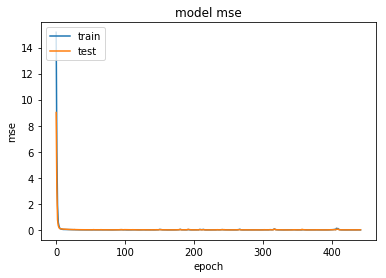

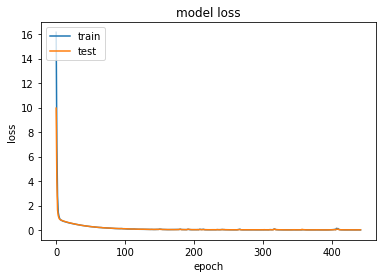

In [117]:
print(history.history.keys())
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 2.2 Selecting best model using GridSearch
GridSearch examines each combination in param_grid to find the best combination. Below is a simple test that tests 10 and 20 epochs. You can also test different models.


In addition to GridSearch, there is also RandomSearch and model-based search. SKLearn has RandomSearch. 

In [51]:
def create_model(optimizer = 'Adam', init = 'glorot_normal'):
    mlp_input = Input(shape=(int(X_train.shape[1]),)) #returns an input tensor.

    #layer instance is called on tensor, and returns tensor.
    x = Dense(150, kernel_initializer='glorot_normal', activation="relu")(mlp_input) 
    x = Dropout(0.5)(x)
    x = Dense(3,activation = 'linear')(x)

    model = Model(mlp_input, x)
    model.compile(optimizer="Adam",
                      loss="mean_squared_error",
                      metrics=['accuracy'])
    return model


model = KerasClassifier(build_fn=create_model, batch_size=10, verbose=2)

# Write this to test different optimizers:
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# param_grid = dict(optimizer=optimizer)

param_grid = dict(epochs=[10,20])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

Epoch 1/10
 - 4s - loss: 1.7815 - acc: 0.8964
Epoch 2/10
 - 3s - loss: 0.7401 - acc: 0.9789
Epoch 3/10
 - 3s - loss: 0.4684 - acc: 0.9886
Epoch 4/10
 - 5s - loss: 0.3282 - acc: 0.9903
Epoch 5/10
 - 5s - loss: 0.2741 - acc: 0.9918
Epoch 6/10
 - 3s - loss: 0.2187 - acc: 0.9935
Epoch 7/10
 - 4s - loss: 0.1503 - acc: 0.9931
Epoch 8/10
 - 3s - loss: 0.1236 - acc: 0.9940
Epoch 9/10
 - 3s - loss: 0.1143 - acc: 0.9943
Epoch 10/10
 - 3s - loss: 0.0596 - acc: 0.9937
Epoch 1/10
 - 4s - loss: 1.5587 - acc: 0.9255
Epoch 2/10
 - 4s - loss: 0.8766 - acc: 0.9841
Epoch 3/10
 - 4s - loss: 0.5288 - acc: 0.9894
Epoch 4/10
 - 4s - loss: 0.4506 - acc: 0.9914
Epoch 5/10
 - 4s - loss: 0.2765 - acc: 0.9915
Epoch 6/10
 - 4s - loss: 0.2011 - acc: 0.9918
Epoch 7/10
 - 4s - loss: 0.1709 - acc: 0.9931
Epoch 8/10
 - 4s - loss: 0.1370 - acc: 0.9931
Epoch 9/10
 - 4s - loss: 0.0912 - acc: 0.9943
Epoch 10/10
 - 4s - loss: 0.0659 - acc: 0.9937
Epoch 1/10
 - 4s - loss: 1.6541 - acc: 0.9170
Epoch 2/10
 - 4s - loss: 0.7094 

In [6]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.996016 using {'epochs': 10}
0.996016 (0.002440) with: {'epochs': 10}
0.996016 (0.002440) with: {'epochs': 20}


### 2.3 K-Fold Cross-Validation on Keras

K-Fold CV splits the data set into K sets, training K-1 and testing on 1, then repeating K times. 
Below is an example using 5 splits (Train on 4/5, test on 1/5 of total data set). This is a method of evaluating the accuracy of your model.

In [86]:
early = EarlyStopping(monitor='loss', patience=50, verbose=2) 

seed = 7
np.random.seed(seed)
kf = KFold(n_splits=5, shuffle=True, random_state=seed) 
cvscores = []
for train, test in kf.split(X_train, Y_train):
  # create model
#     mlp_input = Input(shape=(int(X_train.shape[1]),))
#     x = Dense(150, kernel_initializer='glorot_normal', activation="relu")(mlp_input) 
#     x = BatchNormalization()(x)
#     x = Dropout(0.5)(x)
#     x = Dense(3,activation = 'linear')(x)

#     model = Model(mlp_input, x)
#     model.compile(optimizer="Adam",
#                       loss="mean_squared_error",
#                       metrics=['accuracy', 'mse'])
#     # Fit the model. Note that the train and test sets are different for each split. Each fraction will used as the validation
#     #set eventually.
#     model.fit(X_train[train], Y_train[train], validation_data=(X_train[test],Y_train[test]),epochs=100, 
#               callbacks = [early], batch_size=10, verbose=0)
#     # evaluate the model
#     scores = model.evaluate(X_train[test], Y_train[test], verbose=0)
#     cvscores.append(scores[1] * 100)

    mlp_input = Input(shape=(int(X_train.shape[1]),)) #returns an input tensor. Special because you just specify the shape.
    x = Dense(100, kernel_initializer='glorot_normal', activation='relu', kernel_regularizer = regularizers.l2(0.01))(mlp_input)
    #x = Dropout(0.5)(x) 
    x = Dense(3, activation='linear')(x) 
    model = Model(mlp_input, x) #input = mlp_input, output = x.
    model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mse'])
    model.fit(X_train[train],Y_train[train],validation_data=(X_train[test],Y_train[test]), callbacks=[early], epochs=100)
    scores = model.evaluate(X_train[test], Y_train[test], verbose=0)
    cvscores.append(scores[1] * 100)

print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 404 samples, validate on 101 samples
Epoch 1/100
404/404 [==============================] - 2s 5ms/step - loss: 14.7524 - mean_squared_error: 13.7587 - val_loss: 8.8611 - val_mean_squared_error: 7.9012
Epoch 2/100
404/404 [==============================] - 0s 187us/step - loss: 5.3727 - mean_squared_error: 4.4312 - val_loss: 2.4555 - val_mean_squared_error: 1.5321
Epoch 3/100
404/404 [==============================] - 0s 220us/step - loss: 1.7525 - mean_squared_error: 0.8412 - val_loss: 1.4791 - val_mean_squared_error: 0.5843
Epoch 4/100
404/404 [==============================] - 0s 201us/step - loss: 1.3455 - mean_squared_error: 0.4681 - val_loss: 1.1155 - val_mean_squared_error: 0.2612
Epoch 5/100
404/404 [==============================] - 0s 201us/step - loss: 1.0081 - mean_squared_error: 0.1713 - val_loss: 0.9583 - val_mean_squared_error: 0.1412
Epoch 6/100
404/404 [==============================] - 0s 198us/step - loss: 0.9159 - mean_squared_error: 0.1118 - val_loss: 0.88

404/404 [==============================] - 0s 173us/step - loss: 0.1283 - mean_squared_error: 0.0434 - val_loss: 0.0962 - val_mean_squared_error: 0.0121
Epoch 99/100
404/404 [==============================] - 0s 178us/step - loss: 0.1041 - mean_squared_error: 0.0206 - val_loss: 0.1112 - val_mean_squared_error: 0.0283
Epoch 100/100
404/404 [==============================] - 0s 203us/step - loss: 0.1092 - mean_squared_error: 0.0270 - val_loss: 0.1011 - val_mean_squared_error: 0.0199
Train on 404 samples, validate on 101 samples
Epoch 1/100
404/404 [==============================] - 2s 5ms/step - loss: 13.3783 - mean_squared_error: 12.4034 - val_loss: 7.2468 - val_mean_squared_error: 6.3062
Epoch 2/100
404/404 [==============================] - 0s 188us/step - loss: 5.0451 - mean_squared_error: 4.1245 - val_loss: 2.1688 - val_mean_squared_error: 1.2696
Epoch 3/100
404/404 [==============================] - 0s 220us/step - loss: 1.7478 - mean_squared_error: 0.8633 - val_loss: 1.2066 - val_

404/404 [==============================] - 0s 168us/step - loss: 0.0936 - mean_squared_error: 0.0138 - val_loss: 0.0925 - val_mean_squared_error: 0.0136
Epoch 97/100
404/404 [==============================] - 0s 193us/step - loss: 0.0924 - mean_squared_error: 0.0143 - val_loss: 0.0911 - val_mean_squared_error: 0.0138
Epoch 98/100
404/404 [==============================] - 0s 206us/step - loss: 0.0905 - mean_squared_error: 0.0139 - val_loss: 0.0851 - val_mean_squared_error: 0.0094
Epoch 99/100
404/404 [==============================] - 0s 198us/step - loss: 0.0905 - mean_squared_error: 0.0157 - val_loss: 0.0810 - val_mean_squared_error: 0.0069
Epoch 100/100
404/404 [==============================] - 0s 223us/step - loss: 0.0816 - mean_squared_error: 0.0081 - val_loss: 0.0816 - val_mean_squared_error: 0.0090
Train on 404 samples, validate on 101 samples
Epoch 1/100
404/404 [==============================] - 2s 5ms/step - loss: 15.2703 - mean_squared_error: 14.2784 - val_loss: 9.0427 - va

404/404 [==============================] - 0s 161us/step - loss: 0.1200 - mean_squared_error: 0.0075 - val_loss: 0.1294 - val_mean_squared_error: 0.0182
Epoch 95/100
404/404 [==============================] - 0s 181us/step - loss: 0.1157 - mean_squared_error: 0.0057 - val_loss: 0.1253 - val_mean_squared_error: 0.0167
Epoch 96/100
404/404 [==============================] - 0s 223us/step - loss: 0.1129 - mean_squared_error: 0.0054 - val_loss: 0.1202 - val_mean_squared_error: 0.0138
Epoch 97/100
404/404 [==============================] - 0s 196us/step - loss: 0.1104 - mean_squared_error: 0.0051 - val_loss: 0.1191 - val_mean_squared_error: 0.0152
Epoch 98/100
404/404 [==============================] - 0s 233us/step - loss: 0.1097 - mean_squared_error: 0.0067 - val_loss: 0.1182 - val_mean_squared_error: 0.0166
Epoch 99/100
404/404 [==============================] - 0s 203us/step - loss: 0.1064 - mean_squared_error: 0.0056 - val_loss: 0.1197 - val_mean_squared_error: 0.0201
Epoch 100/100
404

Epoch 43/100
404/404 [==============================] - 0s 178us/step - loss: 0.3527 - mean_squared_error: 0.0110 - val_loss: 0.3813 - val_mean_squared_error: 0.0440
Epoch 44/100
404/404 [==============================] - 0s 193us/step - loss: 0.3435 - mean_squared_error: 0.0097 - val_loss: 0.3716 - val_mean_squared_error: 0.0421
Epoch 45/100
404/404 [==============================] - 0s 203us/step - loss: 0.3353 - mean_squared_error: 0.0093 - val_loss: 0.3671 - val_mean_squared_error: 0.0454
Epoch 46/100
404/404 [==============================] - 0s 196us/step - loss: 0.3287 - mean_squared_error: 0.0104 - val_loss: 0.3612 - val_mean_squared_error: 0.0470
Epoch 47/100
404/404 [==============================] - 0s 191us/step - loss: 0.3187 - mean_squared_error: 0.0079 - val_loss: 0.3487 - val_mean_squared_error: 0.0418
Epoch 48/100
404/404 [==============================] - 0s 211us/step - loss: 0.3100 - mean_squared_error: 0.0065 - val_loss: 0.3459 - val_mean_squared_error: 0.0464
Epoc

404/404 [==============================] - 0s 173us/step - loss: 0.3156 - mean_squared_error: 0.0105 - val_loss: 0.3131 - val_mean_squared_error: 0.0123
Epoch 42/100
404/404 [==============================] - 0s 206us/step - loss: 0.3066 - mean_squared_error: 0.0095 - val_loss: 0.3004 - val_mean_squared_error: 0.0076
Epoch 43/100
404/404 [==============================] - 0s 191us/step - loss: 0.2968 - mean_squared_error: 0.0075 - val_loss: 0.2943 - val_mean_squared_error: 0.0092
Epoch 44/100
404/404 [==============================] - 0s 215us/step - loss: 0.2895 - mean_squared_error: 0.0077 - val_loss: 0.2865 - val_mean_squared_error: 0.0089
Epoch 45/100
404/404 [==============================] - 0s 220us/step - loss: 0.2822 - mean_squared_error: 0.0079 - val_loss: 0.2788 - val_mean_squared_error: 0.0085
Epoch 46/100
404/404 [==============================] - 0s 206us/step - loss: 0.2731 - mean_squared_error: 0.0060 - val_loss: 0.2699 - val_mean_squared_error: 0.0068
Epoch 47/100
404/

Here is the average accuracy and s.d of accuracy from the k splits:

In [87]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

1.40% (+/- 0.64%)


In [40]:
cvscores

[100.0, 100.0, 100.0, 100.0, 100.0]

## 3. Visualize predicted results
Note that the plots are exponential plots. This is why there are no negative values.

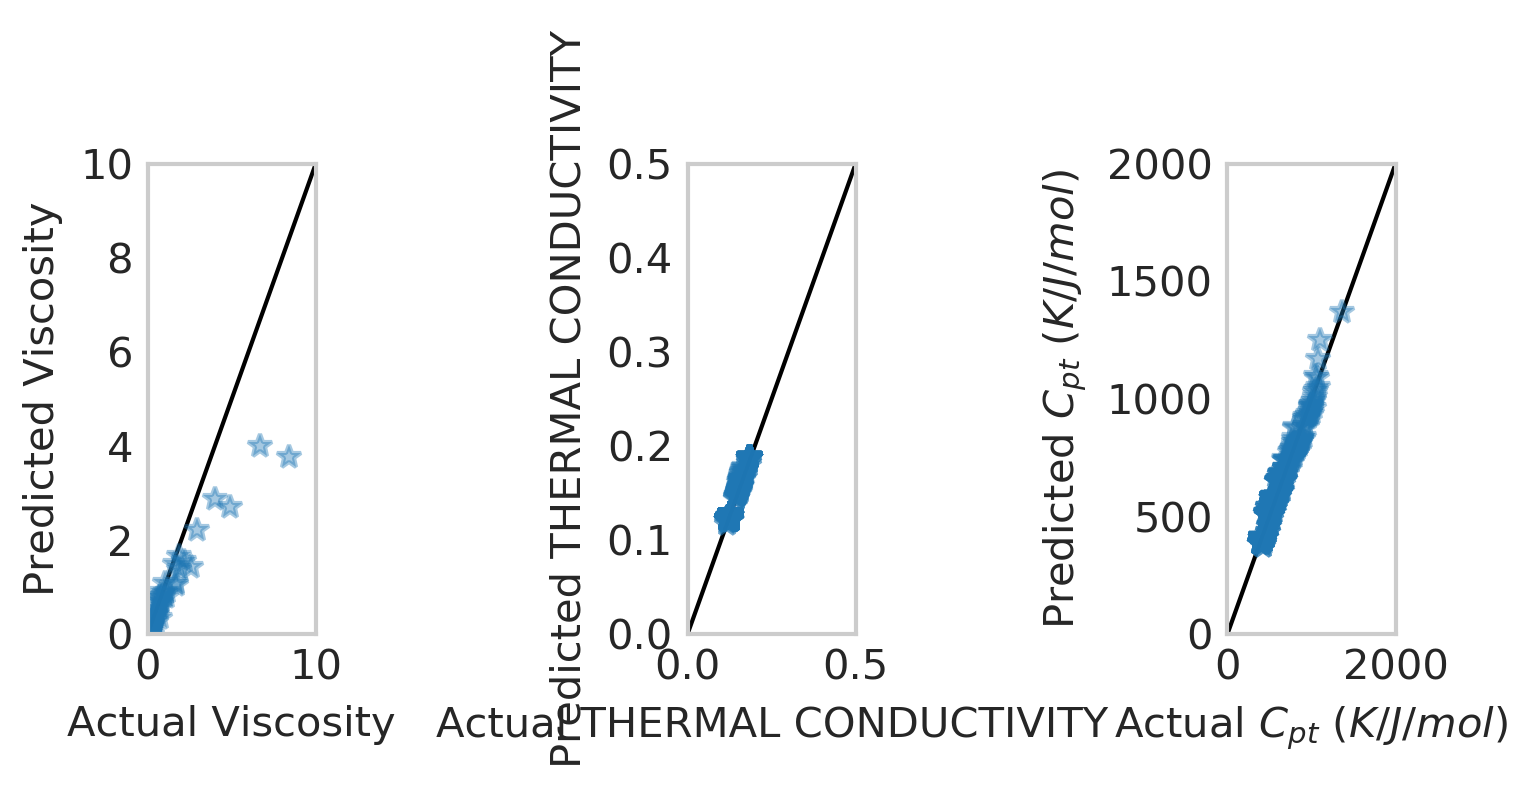

In [119]:
import pandas as pd #import pandas so we can make a dataframe.

#Set X_train and Y_train to X and Y for simplicity when writing code for graphing and such. 
X = X_train
Y = Y_train


#Define the RMSE and R^2 functions. 
def rmse(y,y_pred):
    rms=np.sqrt(mean_squared_error(y,y_pred))
    return rms

def r2(y,y_pred):
    r2 = r2_score(y,y_pred)
    return r2


Y_pred = model.predict(X_test) #X_test is a subset of the original data saved for testing. Y as predicted from these vals.


#Creates a pandas dataframe to easily visualize R^2 and RMSE of each property fit.
df = pd.DataFrame({"RMSE": [rmse(Y_test[:,0],Y_pred[:,0]), rmse(Y_test[:,1], Y_pred[:,1]), rmse(Y_test[:,2], Y_pred[:,2])],
 "$R^2$": [r2(Y_test[:,0],Y_pred[:,0]), r2(Y_test[:,1],Y_pred[:,1]), r2(Y_test[:,2],Y_pred[:,2])], 
                   "Property": ['Viscosity', 'THERMAL CONDUCTIVITY', '$C_{pt}$ $(K/J/mol)$']})

#Make the 3 plots. 
with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(5, 2.5), dpi=300)
    ax = fig.add_subplot(131)
    ax.plot([-20, 20], [-20, 20], linestyle="-", label=None, c="black", linewidth=1)
    ax.plot(np.exp(Y)[:, 0], np.exp(model.predict(X))[:, 0], \
            marker="*", linestyle="", alpha=0.4)
    ax.set_ylabel("Predicted Viscosity")
    ax.set_xlabel("Actual Viscosity")
    #ax.text(0.1,.9,"R: {0:5.3f}".format(multi_model.score(X,Y)), transform = ax.transAxes)
    plt.xlim(0, 10)
    plt.ylim(0,10)
    ax.grid()
    
    ax = fig.add_subplot(132)
    ax.plot([0, 0.5], [0, 0.5], linestyle="-", label=None, c="black", linewidth=1)
    ax.plot(np.exp(Y)[:, 1], np.exp(model.predict(X))[:, 1], \
            marker="*", linestyle="", alpha=0.4)
    ax.set_ylabel("Predicted THERMAL CONDUCTIVITY")
    ax.set_xlabel("Actual THERMAL CONDUCTIVITY")
    plt.xlim(0,0.5)
    plt.ylim(0,0.5)
    ax.grid()

    ax = fig.add_subplot(133)
    ax.plot([0, 2000],[0,2000],linestyle="-",label=None,c="black",linewidth=1)
    ax.plot(np.exp(Y)[:,2],np.exp(model.predict(X))[:,2],\
            marker="*",linestyle="",alpha=0.4)
    ax.set_ylabel("Predicted $C_{pt}$ $(K/J/mol)$")
    ax.set_xlabel("Actual $C_{pt}$ $(K/J/mol)$")
    plt.xlim(0,2000)
    plt.ylim(0,2000)
    ax.grid()
    
    plt.tight_layout()

$R^2$ and $RMSE$ values for each property are displayed below:

In [115]:
df.set_index(['Property'])

,$R^2$,RMSE
Property,,
Viscosity,0.931554,0.275933
Density $(kg/m^3)$,-0.153944,0.166210
$C_{pt}$ $(K/J/mol)$,-3.851077,0.503492
